# Example of performing a linear least squares fit

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

### Let's generate some random data about a trend line

In [ ]:
# set the random number seed
np.random.seed(119)

# set the number of data points to generate
npoints = 50

#set x
x = np.linspace(0.,10.,npoints)

# set slope, intercept, and scatter rms
m = 2.0
b = 1.0
sigma = 2.0

# generate y points
y = m*x + b + np.random.normal(scale=sigma, size=npoints)
y_err = np.full(npoints, sigma)

# Let's just plot the data first

In [ ]:
f = plt.figure(figsize=(7,7))
plt.errorbar(x,y,yerr=y_err,fmt='o')
plt.xlabel('x')
plt.ylabel('y')

## Method #1: polyfit()

In [ ]:
m_fit, b_fit = np.poly1d(np.polyfit(x,y,1,w=1./y_err))
print(m_fit, b_fit)
y_fit = m_fit * x + b_fit

# Plot the result

In [ ]:
f = plt.figure(figsize=(7,7))
plt.errorbar(x,y,yerr=y_err,fmt='o',label="data")
plt.plot(x,y_fit,label='fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=2,frameon=False)

# Method #2: scipy + optimize

In [ ]:
from scipy import optimize

# define a function to fit
def f_line(x,m,b):
    return m*x + b

# perform the fit
params, params_cov = optimize.curve_fit(f_line,x,y,sigma=y_err)

m_fit = params[0]     # best fit
b_fit = params[1]     # best fit intercept
print(m_fit,b_fit)

In [ ]:
f = plt.figure(figsize=(7,7))
plt.errorbar(x,y,yerr=y_err,fmt='o',label="data")
plt.plot(x,y_fit,label='fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=2,frameon=False)

# Much more complicated fits

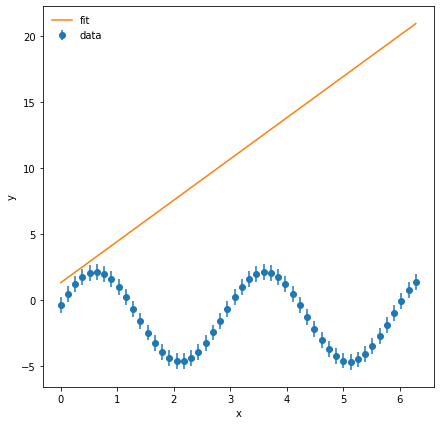

In [11]:
# redefine x and y
npoint = 50
x = np.linspace(0.,2*np.pi, npoints)

# make y a complicated funtion
def cfunc(x,a,b,c,d):
    return a * np.sin(b*x+c) + d

# value of params to generate the data
a = 3.4
b = 2.1
c = 0.27
d = -1.3
sig = 0.6

y = cfunc(x,a,b,c,d)
y_err = np.full(npoints,sig)

f = plt.figure(figsize=(7,7))
plt.errorbar(x,y,yerr=y_err,fmt='o',label="data")
plt.plot(x,y_fit,label='fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=2,frameon=False)

# Perform a fit using scipy.optimize.curve_fit()

In [13]:
from scipy import optimize

# make y a complicated funtion
def cfunc(x,a,b,c,d):
    return a * np.sin(b*x+c) + d

# perform the fit
params,params_cov = optimize.curve_fit(cfunc,x,y,sigma=y_err,p0=[1,2.,0.1,-0.1])

a_fit = params[0]
b_fit = params[1]
c_fit = params[2]
d_fit = params[3]

print(a_fit,b_fit,c_fit,d_fit)

y_fit = a_fit * np.sin(b_fit * x + c_fit) + d_fit

3.4 2.0999999999999996 0.2700000000000003 -1.2999999999999996


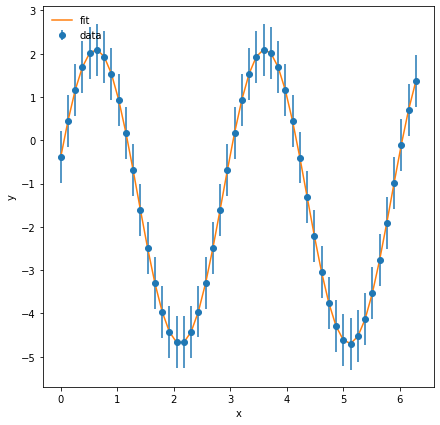

In [14]:
f = plt.figure(figsize=(7,7))
plt.errorbar(x,y,yerr=y_err,fmt='o',label="data")
plt.plot(x,y_fit,label='fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=2,frameon=False)